# Word Embedding and PCA

In [2]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure
import matplotlib.pyplot as plt # Import matplotlib
%matplotlib inline


## Word Embedding

In [3]:
word_embeddings = pickle.load( open( "./data1/word_embeddings_subset.p", "rb" ) )
print(len(word_embeddings)) # there should be 243 words

countryVector = word_embeddings['country'] # Get the vector representation for the word 'country'
print(type(countryVector)) # Print the type of the vector. Note it is a numpy array
print(countryVector) # Print the values of the vector.  

243
<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -

### Function

#### 1. Get the vector for a given word

In [4]:
def vec(w):
    return word_embeddings[w]

#### 2. Define a function to find the closest word to a vector:

- Calculate the vector difference from each word to the input vector

``diff = embedding.values - v ``

- Get the squared L2 norm of each difference vector.

`` delta = np.sum(diff * diff, axis=1) ``

- Find the index of the minimun distance in the array

`` i = np.argmin(delta) ``

- Return the row name for this item

`` return embedding.iloc[i].name ``

In [5]:
def find_closest_word(v, k = 1):
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v 
    # Get the squared L2 norm of each difference vector.
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name

### Operating on word embeddings


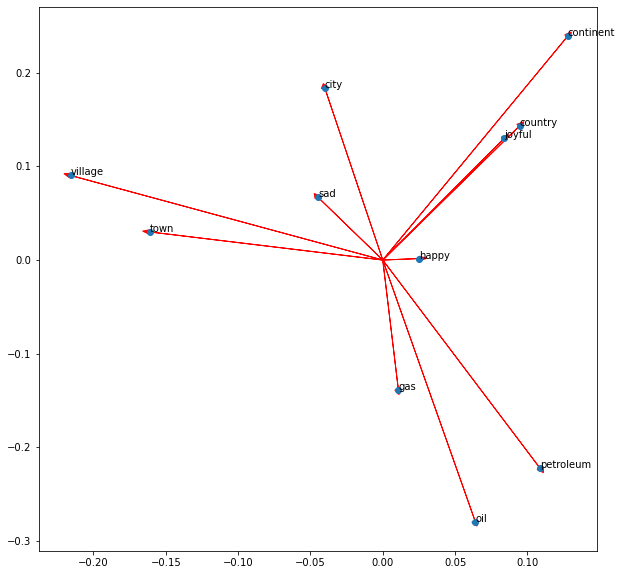

In [6]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axis
col2 = 2 # Select the column for the y axis

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

### Word distance

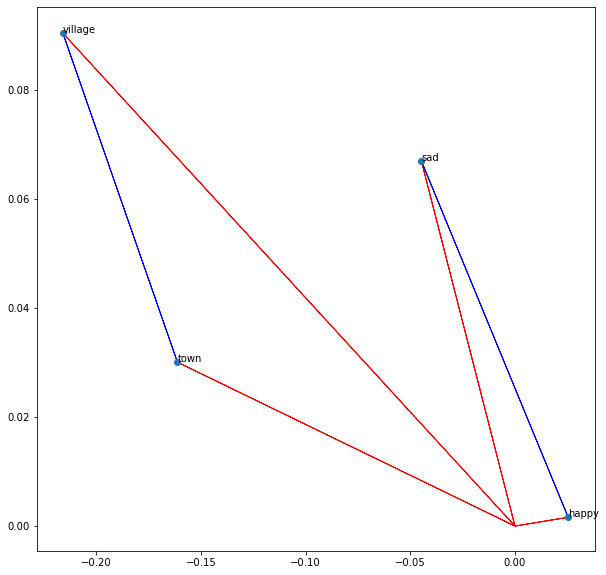

In [7]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axe
col2 = 2 # Select the column for the y axe

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# print the vector difference between village and town
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()


### Linear algebra on word embeddings

In [8]:
print(np.linalg.norm(vec('town'))) # Print the norm of the word town
print(np.linalg.norm(vec('sad'))) # Print the norm of the word sad

2.3858097
2.9004838


### Predicting capitals

We can say that the vector difference between 'France' and 'Paris' represents the concept of Capital.

In [9]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

print(country[0:5]) # Print the first 5 values of the vector

diff = country - vec('Spain')
print(diff[0:10])

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]
[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


In [10]:
# Create a dataframe out of the dictionary embedding. This facilitate the algebraic operations
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])
    
embedding = pd.DataFrame(data=data, index=keys)
embedding.head(20)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742


In [11]:
find_closest_word(country)

'Spain'

In [12]:
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

'Spain'

In [13]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

Germany
China


### Represent a sentence as a vector

In [14]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -

In [15]:
find_closest_word(doc2vec)

'petroleum'

## PCA : Principal Component Analysis

PCA is a statistical technique invented in 1901 by Karl Pearson that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables called Principal Components. 

PCA is based on the Singular Value Decomposition (SVD) of the Covariance Matrix of the original dataset. The Eigenvectors of such decomposition are used as a rotation matrix.  The Eigenvectors are arranged in the rotation matrix in decreasing order according to its explained variance. This last term is related to the EigenValues of the SVD.

PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

In [16]:
import numpy as np                         # Linear algebra library
import matplotlib.pyplot as plt            # library for visualization
from sklearn.decomposition import PCA      # PCA library
import pandas as pd                        # Data frame library
import math                                # Library for math functions
import random                              # Library for pseudo random numbers

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

To start, let us consider a pair of random variables x, y. Consider the base case when y = n * x. The x and y variables will be perfectly correlated to each other since y is just a scaling of x.

**PCA works better if the data is centered**
```python 
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean
```

**Instantiate**

````python
pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables
pcaTr = pca.fit(data)

````

**Transform data based on the roration matrix of pcaTr (fit)**

````python
rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr
````

**Understanding the transformation model pcaTr**

* `pcaTr.components_` has the rotation matrix 
* `pcaTr.explained_variance_` has the explained variance of each principal component

$cos(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y),  \ 0] = [0.0833 + 0.0833, \ 0] = [0.166, \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 


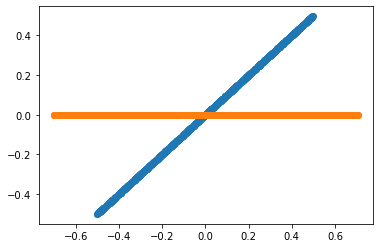

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.66465230e-01 2.08930963e-34]


In [17]:
np.random.seed(1)
n = 1  # The amount of the correlation
x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean

data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, data.y) # Plot the original correlated data in blue

pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr
# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2']) 

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

### Correlated Normal Random Variables.

angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


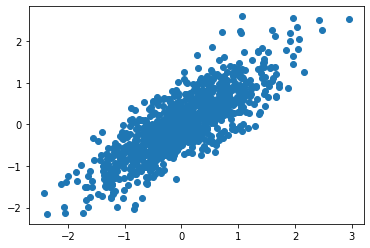

In [20]:
np.random.seed(100)

std1 = 1     # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable

x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000)  # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

# PCA works better if the data is centered
x = x - np.mean(x) # Center x 
y = y - np.mean(y) # Center y

#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance. 
angle = np.arctan(1 / n) # Convert the covariance to and angle
print('angle: ',  angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)]])


print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y

# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]

Eigenvalues or explained variance
[1.09488457 0.11243237]


C:\Users\GUEGUEN\AppData\Local\Temp\ipykernel_23308\1540591202.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
C:\Users\GUEGUEN\AppData\Local\Temp\ipykernel_23308\1540591202.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


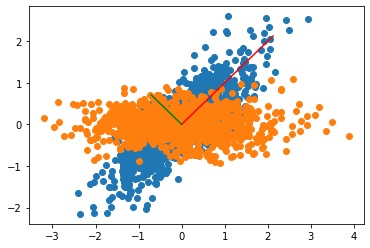

In [21]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the 
# inverse of the original rotationMatrix. 
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()

## PCA as a strategy for dimensionality reduction

The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained Variance. It usually means that the first components retain most of the power of the data to explain the patterns that **generalize** the data. Nevertheless, for some applications, we are interested in the patterns that explain much less Variance, for example, in novelty detection. 

In the next figure, we can see the original data and its corresponding projection using dimenson axes as principal components. In other words, data comprised of a single variable.

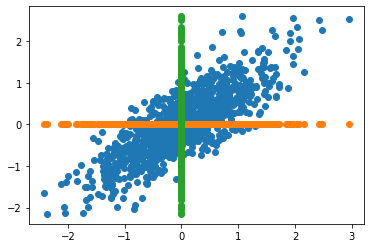

In [22]:
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])

#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))

#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])

plt.show()

## PCA as a strategy to plot complex data

The next chart shows a sample diagram displaying a dataset of pictures of cats and dogs. Raw pictures are composed of hundreds or even thousands of features. However, PCA allows us to reduce that many features to only two. In that reduced space of uncorrelated variables, we can easily separate cats and dogs. 

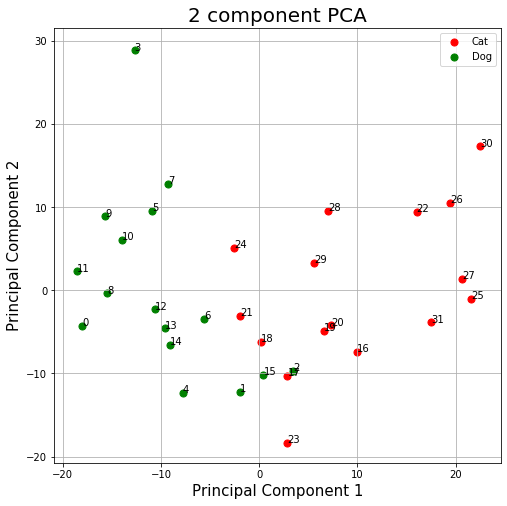
